In [4]:
import numpy as np
import cv2
import glob
import os
import matplotlib.pyplot as plt

from PIL import Image

In [5]:
# Load images Path
result = glob.glob(os.path.join("images", "*"))

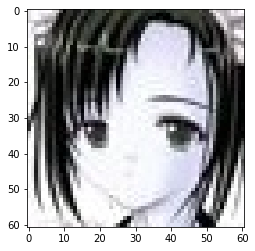

In [6]:
sample = cv2.imread(result[50], cv2.COLOR_BGR2RGB)
plt.imshow(sample)

In [12]:
def anti_aliasing(img):
    pil_img = Image.fromarray(img)
    pil_img = pil_img.resize((64, 64), resample=Image.ANTIALIAS)

    return np.array(pil_img)

In [13]:
sample.shape

(61, 61, 3)

In [14]:
resized_img = []

# Read, Resize, Convert range to -1 to 1
for idx, path in enumerate(result):
    img = cv2.imread(path, cv2.COLOR_BGR2RGB)
    img = anti_aliasing(img)
    img = (img - 127.5) / 127.5
    
    resized_img.append(img)
resized_img = np.asarray(resized_img)

(64, 64, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


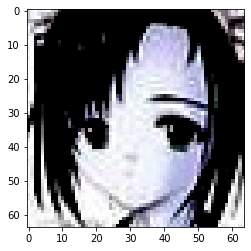

In [15]:
sample = resized_img[50]
print(sample.shape)
plt.imshow(sample)

In [16]:
np.savez("utils//preprocessed.npz", x=resized_img)

In [17]:
generated_noise = np.random.uniform(-1,1,size=[10,100])
np.savez("utils//noise.npz", noise=generated_noise)